<h1 style="text-align:center;"> Phase 1 Objective</h1>

The objective of **Phase 1** is to understand the **market for the credit card launch** through analysis of customer profiles, credit behavior, and transaction trends.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Data import 

In [3]:
df_cust = pd.read_csv(r"D:\my_projects\bank_project_stats\chapter8_assets\dataset\data\phase_1\customers.csv")
df_trans = pd.read_csv(r"D:\my_projects\bank_project_stats\chapter8_assets\dataset\data\phase_1\transactions.csv")
df_cp = pd.read_csv(r"D:\my_projects\bank_project_stats\chapter8_assets\dataset\data\phase_1\credit_profiles.csv")

In [4]:
print(df_cust.shape)
df_cust.head()

(1000, 8)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


In [5]:
print(df_trans.shape)
df_trans.head()


(500000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [6]:
print(df_cp.shape)
df_cp.head()

(1004, 6)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


# treating null values

In [8]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
cust_null = df_cust[df_cust["annual_income"].isnull()]

In [10]:
cust_null.shape

(50, 8)

In [11]:
cust_null.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [12]:
cust_null_occ = cust_null["occupation"].unique()

In [13]:
cust_null_occ

array(['Artist', 'Freelancer', 'Business Owner', 'Data Scientist',
       'Fullstack Developer', 'Consultant'], dtype=object)

In [14]:
filtered_df = df_cust[df_cust['occupation'].isin(cust_null_occ)]

In [15]:
median_income_by_occ = filtered_df.groupby('occupation')['annual_income'].median()

In [16]:
median_income_by_occ

occupation
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [17]:
median_income_by_occ = {
    'Artist': 45794.0,
    'Business Owner': 261191.5,
    'Consultant': 58017.0,
    'Data Scientist': 135759.0,
    'Freelancer': 46759.0,
    'Fullstack Developer': 76774.0
}

In [18]:
df_cust['annual_income'] = df_cust.apply(
    lambda row: median_income_by_occ[row['occupation']] 
                if pd.isnull(row['annual_income']) and row['occupation'] in median_income_by_occ 
                else row['annual_income'],
    axis=1
)


In [19]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

# 🧾 Missing Value Treatment Summary

In the `df_cust` (Customer Table), there were **50 missing values** in the `annual_income` column.  
To handle this, we replaced the missing values with the **median annual income** based on each customer's **occupation**.

### Median Values Used
| Occupation           | Median Annual Income |
|----------------------|----------------------|
| Artist               | 45,794.0             |
| Business Owner       | 261,191.5            |
| Consultant           | 58,017.0             |
| Data Scientist       | 135,759.0            |
| Freelancer           | 46,759.0             |
| Fullstack Developer  | 76,774.0             |

After imputation, the `annual_income` column has **no missing values**.


# Customer annual income distribution

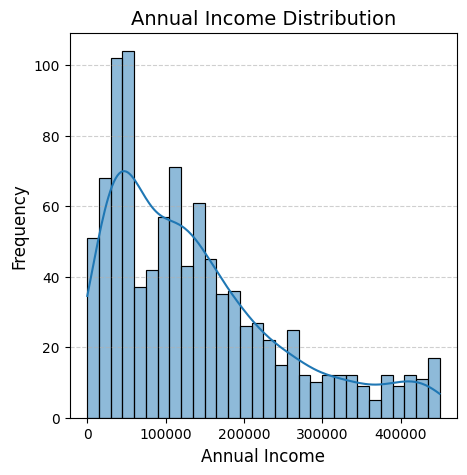

In [22]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], bins = 30,kde=True,label = "Data")


plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()


# Outlier Analysis

In [24]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


### Annual Income

In [26]:


df_cust[df_cust["annual_income"]<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


In [27]:
df_cust.loc[df_cust['annual_income'] < 100, 'annual_income'] = (
    df_cust.loc[df_cust['annual_income'] < 100, 'occupation']
    .map(median_income_by_occ)
)

In [28]:
df_cust[df_cust["annual_income"]<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [29]:
df_cust.loc[316]


cust_id                       317
name              Avinash Chauhan
gender                       Male
age                            47
location                     City
occupation             Consultant
annual_income             58017.0
marital_status            Married
Name: 316, dtype: object

In [30]:
df_cust.loc[31]

cust_id                       32
name                Veer Gambhir
gender                      Male
age                           50
location                    City
occupation        Business Owner
annual_income           261191.5
marital_status           Married
Name: 31, dtype: object

### Age

In [32]:


df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [33]:
df_cust[(df_cust["age"]<15) | (df_cust["age"]>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Amaira Dewan,Male,110,City,Consultant,96522.0,Single
295,296,Veer Anand,Male,1,Rural,Accountant,55254.0,Married
325,326,Yash Chatterjee,Male,110,City,Accountant,61021.0,Single
610,611,Advait Mangal,Male,135,Rural,Business Owner,444776.0,Married
692,693,Aarohi Dubey,Male,1,City,Business Owner,83045.0,Married


In [34]:
outlier_mask = (df_cust["age"] < 15) | (df_cust["age"] > 80)


In [35]:
occupation_medians = df_cust.groupby("occupation")["age"].median()

In [36]:
df_cust.loc[outlier_mask, "age"] = df_cust.loc[outlier_mask, "occupation"].map(occupation_medians)

In [37]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

# 💰 Outlier Treatment Summary  

In the `df_cust` dataset:  

- Records with **annual_income < 100** were identified as outliers and replaced with the **median annual income** of the corresponding **occupation** to maintain realistic income values.  
- Records with **age < 15** or **age > 80** were identified as outliers and replaced with the **median age** of the respective **occupation** to ensure consistency and accuracy in age distribution.  


# Exploratory Data Analysis

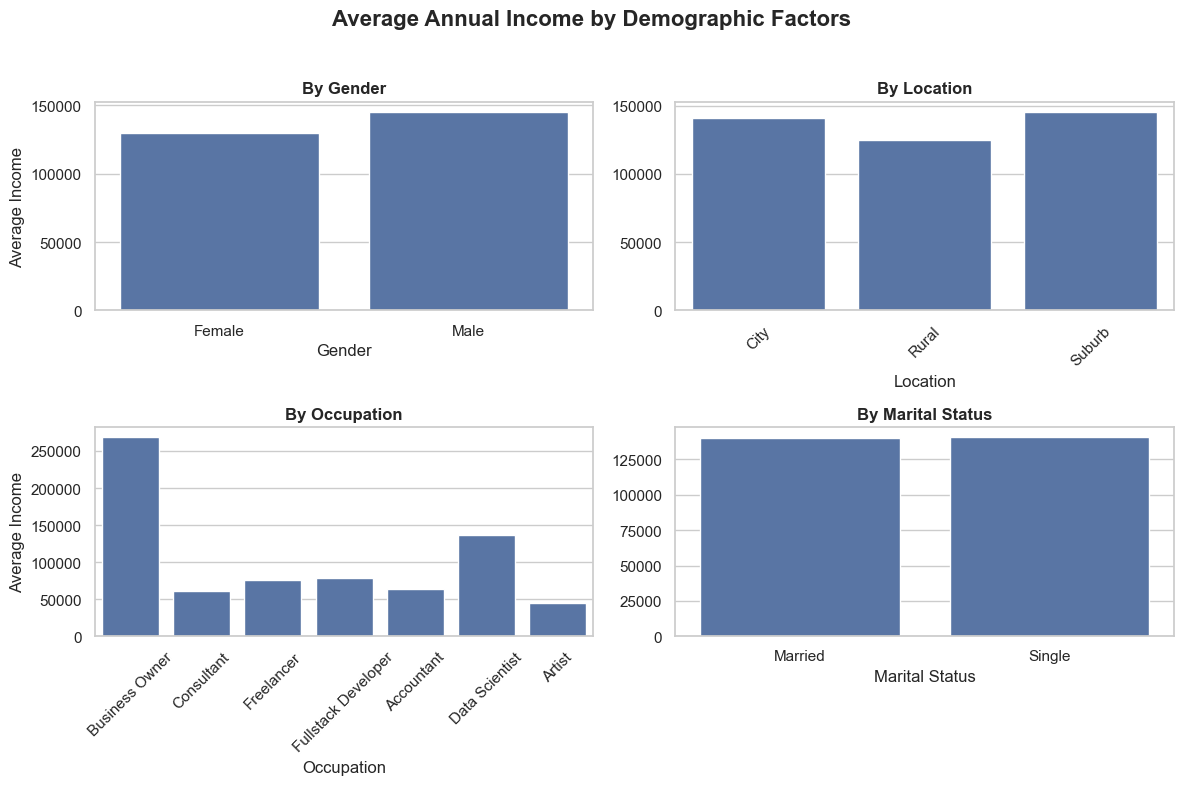

In [40]:


# Set style
sns.set(style="whitegrid")

# Columns to visualize
cols = ['gender', 'location', 'occupation', 'marital_status']
titles = ['By Gender', 'By Location', 'By Occupation', 'By Marital Status']

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Average Annual Income by Demographic Factors', fontsize=16, fontweight='bold')

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a barplot
for i, col in enumerate(cols):
    sns.barplot(x=col, y='annual_income', data=df_cust, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Average Income' if i % 2 == 0 else '')
    axes[i].tick_params(axis='x', rotation=45 if col in ['location', 'occupation'] else 0)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

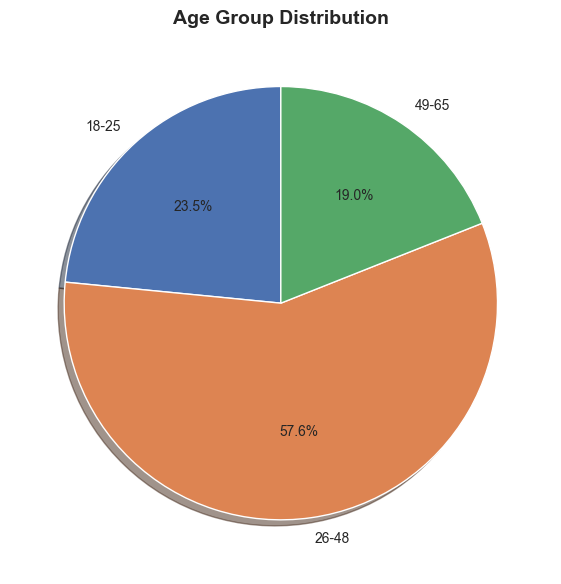

In [41]:
bins = [18, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']

# Create age groups
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels, right=True)

# Count of each age group
age_counts = df_cust['age_group'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    age_counts, 
    labels=age_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    textprops={'fontsize': 10}
)
plt.title('Age Group Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

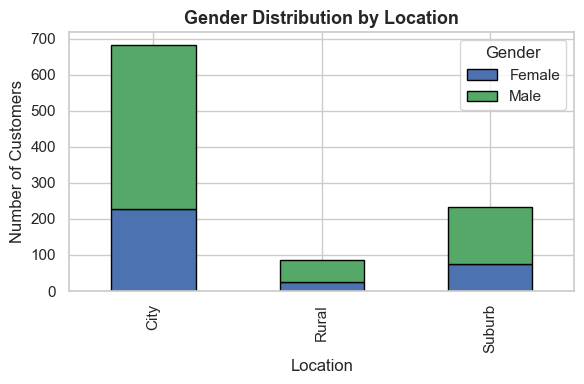

In [42]:
stack_data = df_cust.pivot_table(
    index='location', 
    columns='gender', 
    values='cust_id', 
    aggfunc='count'
)

# Plot stacked bar chart
stack_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(6,4), 
    color=['#4C72B0', '#55A868'], 
    edgecolor='black'
)

plt.title('Gender Distribution by Location', fontsize=13, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Exploring customer profile

In [44]:
df_cp.head()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [45]:
df_cp.shape

(1004, 6)

In [46]:
df_cust.shape

(1000, 9)

In [47]:
duplicates = df_cp[df_cp['cust_id'].duplicated(keep=False)]

In [48]:
print(f"Number of duplicate cust_id records: {duplicates['cust_id'].nunique()}")
display(duplicates)

Number of duplicate cust_id records: 4


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [49]:
duplicate_ids = df_cp[df_cp['cust_id'].duplicated(keep=False)]['cust_id']

In [50]:
df_cp_1 = df_cp[~df_cp['cust_id'].isin(duplicate_ids) | df_cp.notna().all(axis=1)]

In [51]:
df_cp_1.shape

(1000, 6)

In [52]:
df_cp_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [53]:
df_cp_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


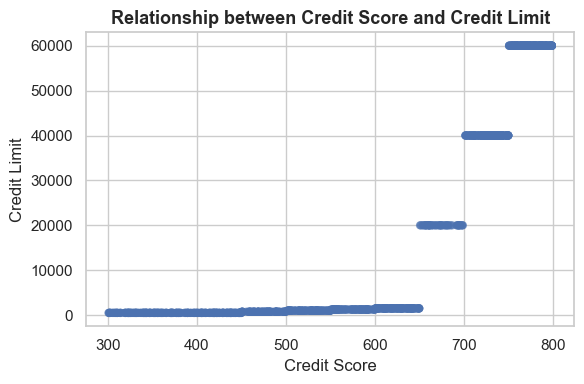

Correlation between credit_score and credit_limit: 0.84


In [54]:
# Scatter plot to visualize relationship
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_cp, 
    x='credit_score', 
    y='credit_limit', 
    alpha=0.7, 
    edgecolor='none'
)
plt.title('Relationship between Credit Score and Credit Limit', fontsize=13, fontweight='bold')
plt.xlabel('Credit Score')
plt.ylabel('Credit Limit')
plt.tight_layout()
plt.show()

# Calculate correlation
corr = df_cp_1[['credit_score', 'credit_limit']].corr().iloc[0,1]
print(f"Correlation between credit_score and credit_limit: {corr:.2f}")

In [55]:
bins = [300, 450, 500, 550, 600, 650, 700, 750, 800]
labels = ['300–449', '450–499', '500–549', '550–599', '600–649', '650–699', '700–749', '750–799']

In [56]:
df_cp_1['credit_score_group'] = pd.cut(df_cp_1['credit_score'], bins=bins, labels=labels, right=True,include_lowest=True)


In [57]:
df_cp_1['credit_limit'] = df_cp_1.groupby('credit_score_group')['credit_limit'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median())
)

In [58]:
df_cp_1.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_group                0
dtype: int64

### 💳 Credit Limit Imputation

To handle missing values in the `credit_limit` column:

- The `credit_score` values were categorized into defined score ranges.
- Missing `credit_limit` values were filled using the **mode** of each credit score group.
- If the mode was unavailable, the **median** was used as a fallback.
- This ensures the imputed credit limits remain realistic and consistent with the customer's credit score range.


In [60]:
df_cp_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


# Outlier analysis 

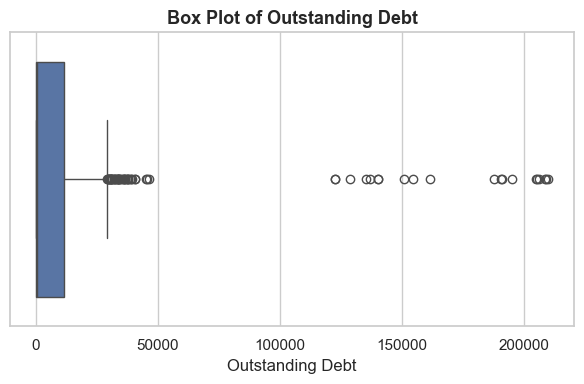

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_cp_1, x='outstanding_debt')
plt.title('Box Plot of Outstanding Debt', fontsize=13, fontweight='bold')
plt.xlabel('Outstanding Debt')
plt.tight_layout()
plt.show()



In [63]:
invalid_debt = df_cp_1[df_cp_1['outstanding_debt'] > df_cp_1['credit_limit']]

In [64]:
invalid_debt

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
1,2,587,0.107928,161644.0,2.0,1250.0,550–599
19,20,647,0.439132,205014.0,3.0,1500.0,600–649
25,26,758,0.250811,190838.0,2.0,60000.0,750–799
38,39,734,0.573023,122758.0,3.0,40000.0,700–749
93,94,737,0.739948,137058.0,2.0,40000.0,700–749
204,205,303,0.364360,187849.0,0.0,500.0,300–449
271,272,703,0.446886,154568.0,1.0,40000.0,700–749
301,302,722,0.608076,122402.0,4.0,40000.0,700–749
330,331,799,0.363420,208898.0,4.0,60000.0,750–799
350,351,320,0.285081,150860.0,0.0,500.0,300–449


In [65]:
df_cp_1.loc[df_cp_1['outstanding_debt'] > df_cp_1['credit_limit'], 'outstanding_debt'] = \
    df_cp_1['credit_limit']

In [66]:
print("Remaining invalid records:",
      len(df_cp_1[df_cp_1['outstanding_debt'] > df_cp_1['credit_limit']]))

Remaining invalid records: 0


In [67]:
df_cp_1[df_cp_1['outstanding_debt'] > df_cp_1['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group


In [68]:
df_cp_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.000000


# Correlation Analysis

In [70]:
df_merged = df_cust.merge(df_cp_1,on = "cust_id",how = "inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700–749
1,2,Kabir Thakur,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550–599
2,3,Kriti Mangal,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500–549
3,4,Sara Dwivedi,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500–549
4,5,Aarohi Negi,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700–749


In [71]:
df_merged.shape

(1000, 15)

In [72]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   cust_id                         1000 non-null   int64   
 1   name                            1000 non-null   object  
 2   gender                          1000 non-null   object  
 3   age                             1000 non-null   float64 
 4   location                        1000 non-null   object  
 5   occupation                      1000 non-null   object  
 6   annual_income                   1000 non-null   float64 
 7   marital_status                  1000 non-null   object  
 8   age_group                       985 non-null    category
 9   credit_score                    1000 non-null   int64   
 10  credit_utilisation              1000 non-null   float64 
 11  outstanding_debt                1000 non-null   float64 
 12  credit_inquiries_last

In [73]:
numeric_columns = ["credit_score","credit_utilisation","outstanding_debt","credit_limit","annual_income","age"]

In [74]:
corr_matrix = df_merged[numeric_columns].corr()

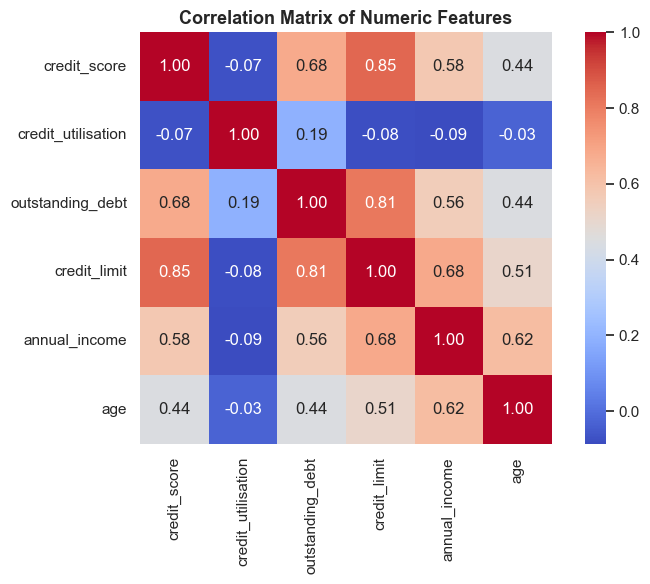

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Exploring Transaction data 

In [77]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [78]:
df_trans.shape

(500000, 7)

In [79]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [80]:
(4941/500000)*100

0.9882

In [81]:
df_trans["platform"].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [82]:
df_trans[df_trans["platform"].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [83]:
df_trans["platform"].mode()

0    Amazon
Name: platform, dtype: object

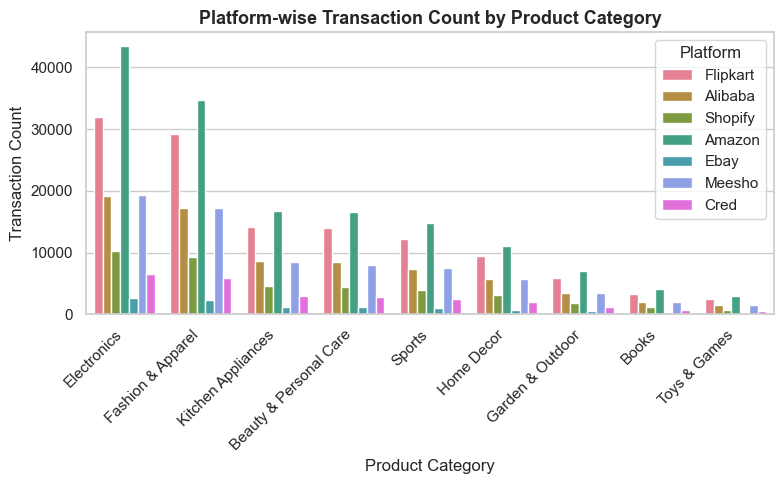

In [84]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_trans,
    x='product_category',
    hue='platform',
    order=df_trans['product_category'].value_counts().index,
    palette='husl'
)
plt.title('Platform-wise Transaction Count by Product Category', fontsize=13, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

In [85]:
df_trans['platform'].fillna('Amazon', inplace=True)


In [86]:
df_trans.isna().sum()


tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [87]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [88]:
invalid_trans = df_trans[df_trans['tran_amount'] == 0]

In [89]:
invalid_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [90]:
invalid_trans[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [91]:
median_val = df_trans[
    (df_trans['platform'] == 'Amazon') &
    (df_trans['product_category'] == 'Electronics') &
    (df_trans['payment_type'] == 'Credit Card') &
    (df_trans['tran_amount'] != 0)
]['tran_amount'].median()

In [92]:
df_trans.loc[df_trans['tran_amount'] == 0, 'tran_amount'] = median_val


In [93]:
print(f"Replaced 0-value transactions with median: {median_val}")

Replaced 0-value transactions with median: 554.0


In [94]:
df_trans[df_trans['tran_amount'] == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


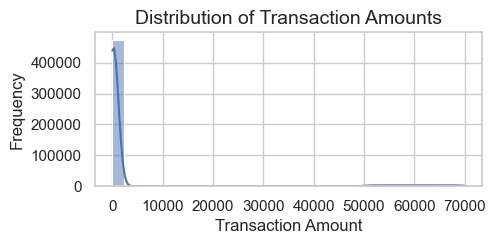

In [95]:
plt.figure(figsize=(5, 2))
sns.histplot(df_trans['tran_amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [96]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


#### IQR method for outlier Analysis 

In [98]:
Q1,Q3 = df_trans["tran_amount"].quantile([0.25,0.75])


In [99]:
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [100]:
lower,upper

(-454.5, 933.5)

### By applying the business knowledge lets take 2 times of IQR instead for outlier analysis

In [102]:
lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

In [103]:
lower,upper

(-628.0, 1107.0)

In [104]:
outliers = df_trans[df_trans["tran_amount"] > upper]

In [105]:
outliers.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [106]:
outliers.shape

(25000, 7)

In [107]:
mean_amounts = (
    df_trans[df_trans["tran_amount"] <= upper]
    .groupby("product_category")["tran_amount"]
    .mean()
)


In [108]:
df_trans.loc[df_trans["tran_amount"] > upper, "tran_amount"] = (
    df_trans.loc[df_trans["tran_amount"] > upper, "product_category"]
    .map(mean_amounts)
)

In [109]:
df_trans[df_trans["tran_amount"] > upper].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


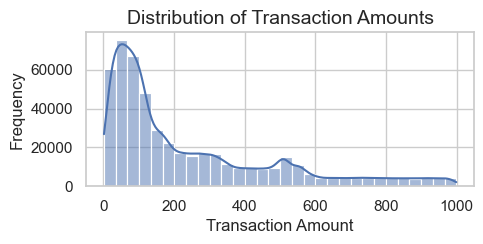

In [110]:
plt.figure(figsize=(5, 2))
sns.histplot(df_trans['tran_amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 🔧 Outlier Treatment (tran_amount)

- Used **IQR method** with `2 × IQR` for upper bound (based on business input).  
- Ignored lower bound.  
- Replaced outliers (above upper bound) with **mean tran_amount** of their respective `product_category` (below upper bound).  
- Distribution looks clean and balanced after replacement.


In [112]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


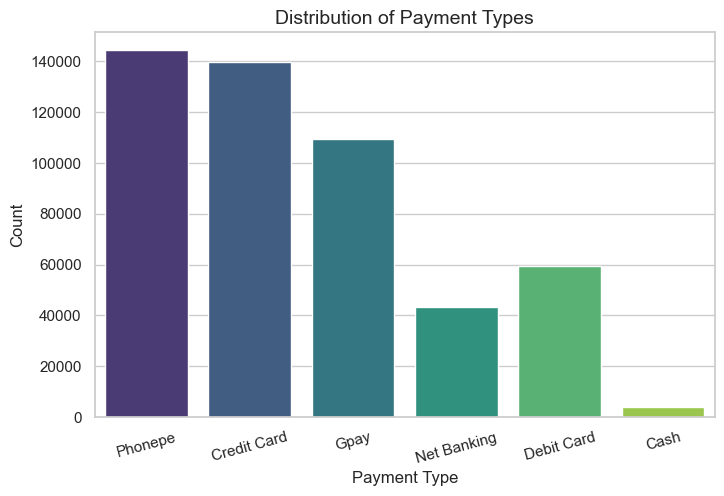

In [113]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_trans, x='payment_type', palette='viridis')
plt.title('Distribution of Payment Types', fontsize=14)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

In [114]:
df_merged = pd.merge(df_merged, df_trans, on='cust_id', how='inner')


In [115]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700–749,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700–749,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700–749,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700–749,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Dhruv Bansal,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700–749,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [116]:
df_merged.shape

(500000, 21)

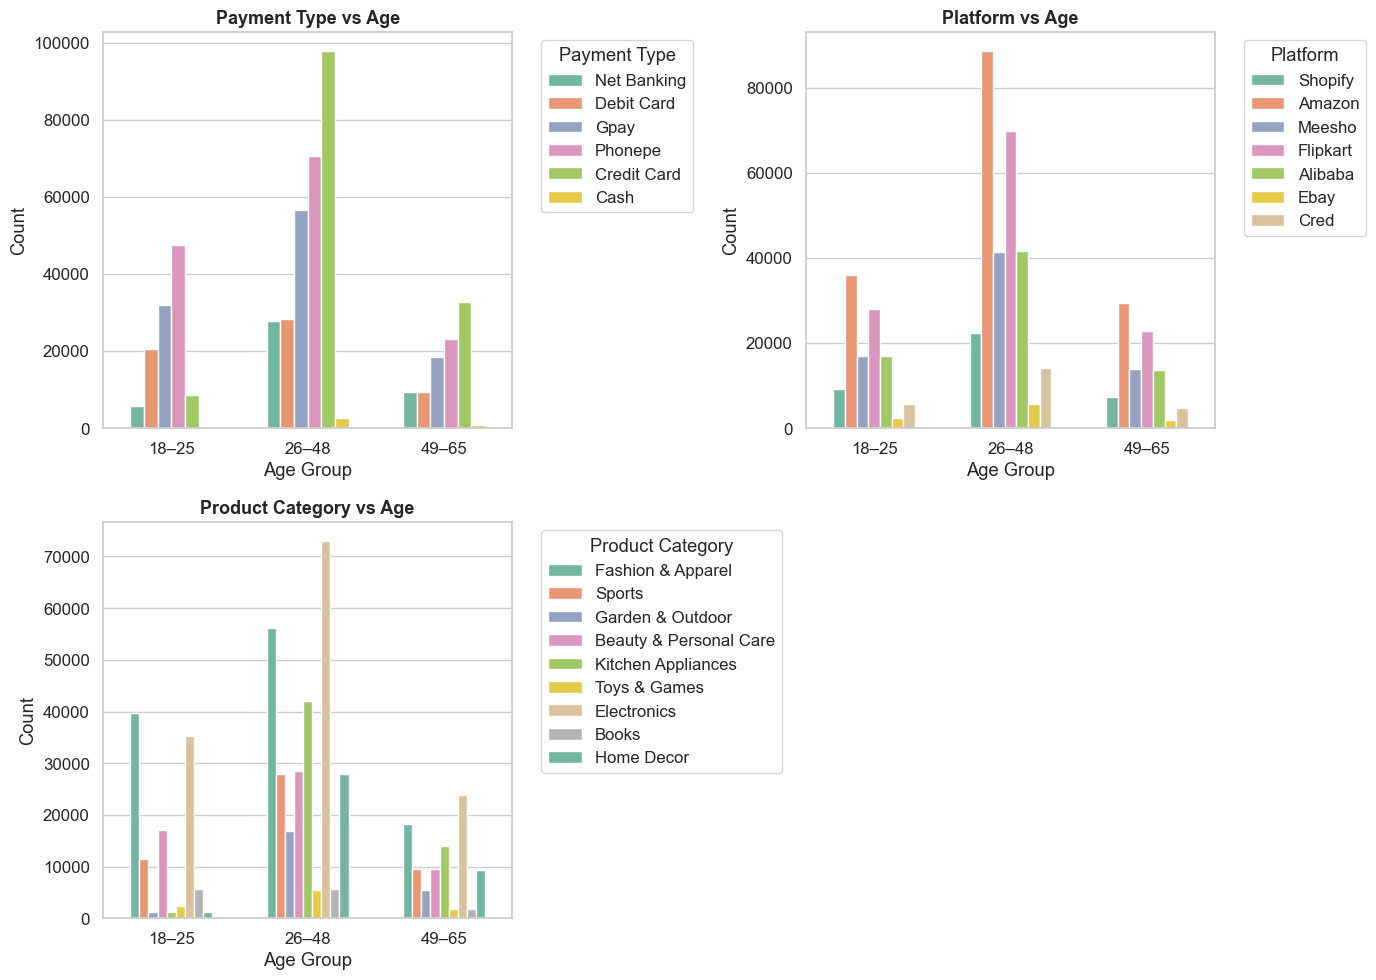

In [117]:
df_merged['age_group'] = pd.cut(df_merged['age'], bins=[18, 25, 48, 65],
                                labels=['18–25', '26–48', '49–65'], right=True)

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Create 2x2 grid but use only 3 plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

# Plot definitions
plots = [
    ('payment_type', 'Payment Type vs Age'),
    ('platform', 'Platform vs Age'),
    ('product_category', 'Product Category vs Age')
]

# Generate the 3 plots
for i, (hue, title) in enumerate(plots):
    sns.countplot(data=df_merged, x='age_group', hue=hue, ax=axes[i], width=0.6, palette='Set2')
    axes[i].set_title(title, fontsize=13, fontweight='bold')
    axes[i].set_xlabel("Age Group")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=hue.replace('_',' ').title(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the unused 4th subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

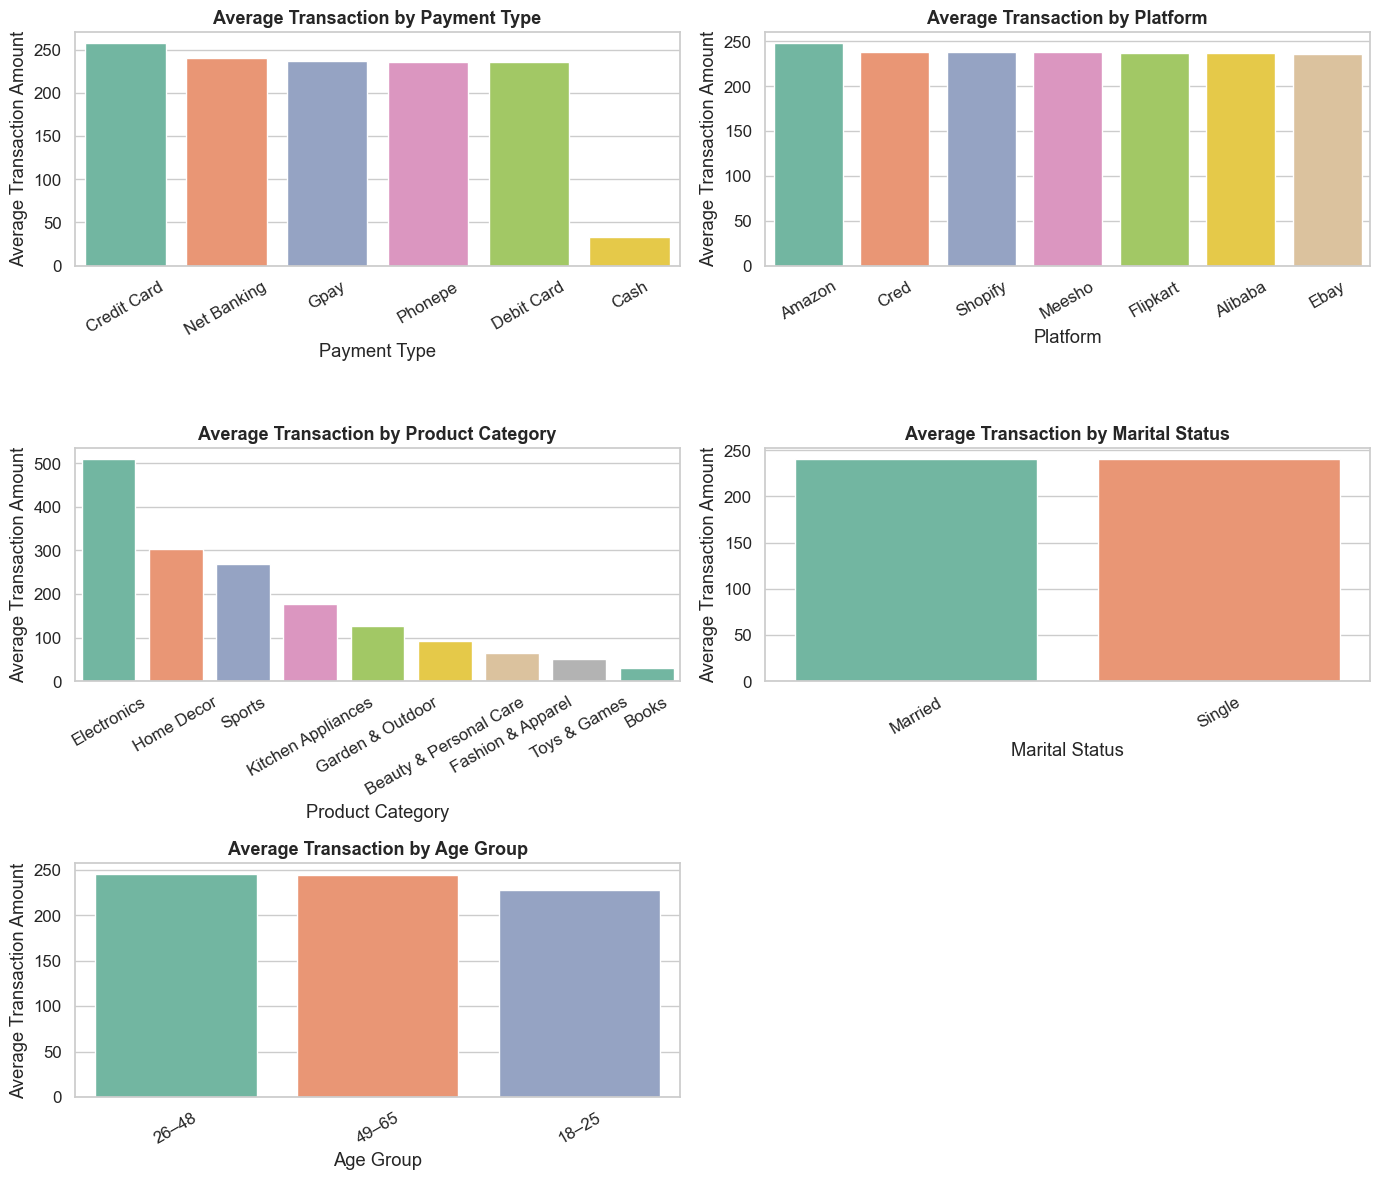

In [118]:
sns.set(style="whitegrid", font_scale=1.1)

# Columns to visualize
cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

# Create 3x2 grid (we’ll use only 5)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Generate plots
for i, col in enumerate(cols):
    # Calculate mean and sort descending
    order = df_merged.groupby(col)['tran_amount'].mean().sort_values(ascending=False).index
    
    sns.barplot(
        data=df_merged,
        x=col,
        y='tran_amount',
        ax=axes[i],
        order=order,
        palette='Set2',
        ci=None
    )
    axes[i].set_title(f'Average Transaction by {col.replace("_", " ").title()}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel("Average Transaction Amount")
    axes[i].tick_params(axis='x', rotation=30)

# Remove the empty subplot (6th one)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Age Group Analysis

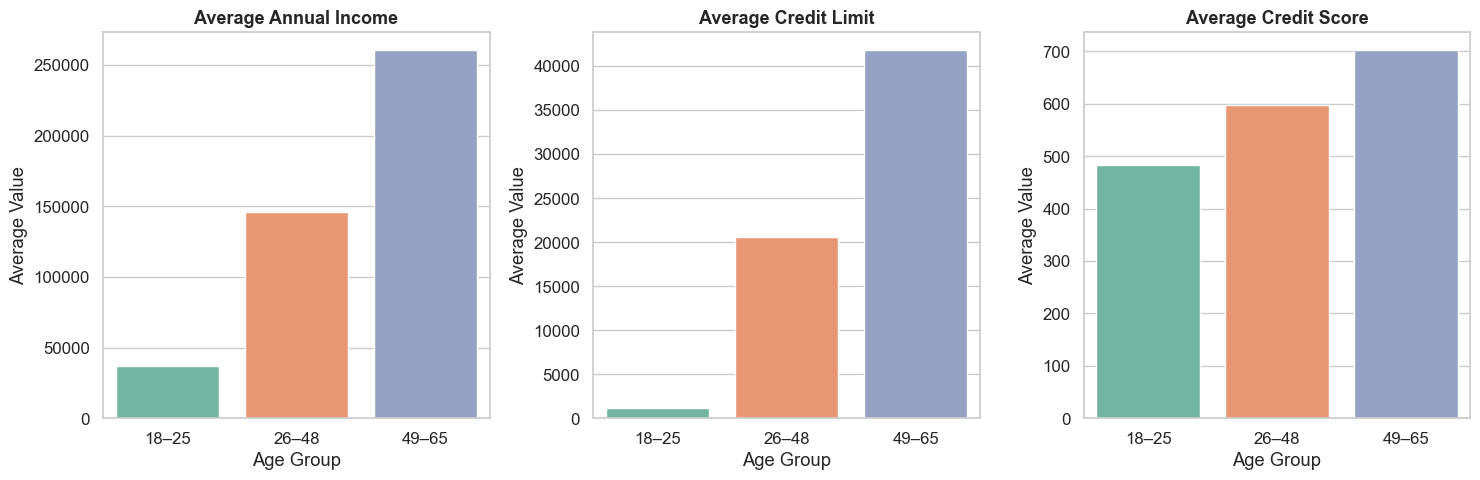

In [222]:
sns.set(style="whitegrid", font_scale=1.1)

# Metrics to visualize
metrics = ['annual_income', 'credit_limit', 'credit_score']
titles = ['Average Annual Income', 'Average Credit Limit', 'Average Credit Score']

# Create 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each metric
for i, col in enumerate(metrics):
    sns.barplot(
        data=df_merged,
        x='age_group',
        y=col,
        ax=axes[i],
        palette='Set2',
        ci=None,
        order=['18–25', '26–48', '49–65']  # keep consistent order
    )
    axes[i].set_title(titles[i], fontsize=13, fontweight='bold')
    axes[i].set_xlabel("Age Group")
    axes[i].set_ylabel("Average Value")
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 📊 Phase 1 Analysis – Customer & Transaction Insights

## 1️⃣ Demographic Overview
- The dataset shows three major age groups: **18–25, 26–48, and 49–65**.  
- The **26–48 group dominates** (≈58%), followed by **18–25 (≈23%)** and **49–65 (≈19%)**.

---

## 2️⃣ Financial Insights
- **Average Annual Income**, **Credit Limit**, and **Credit Score** all increase with age.
- However, the **18–25 segment**, despite having lower income and credit limit, still maintains a **moderate credit score**, indicating responsible early users.

---

## 3️⃣ Platform & Payment Behavior
- **Amazon** and **Flipkart** dominate transactions, especially for users aged **26–48**, followed by **Meesho** and **Shopify**.  
- The **18–25 group** shows strong engagement with **Credit Card** and **UPI (GPay/PhonePe)**, indicating digital adaptability and trust in online platforms.

---

## 4️⃣ Product Category Insights
- Top categories: **Fashion & Apparel** and **Electronics** across all age groups.
- The **18–25 group** primarily spends on **Fashion & Apparel** and **Electronics**, suggesting high tech-awareness and lifestyle interest.

---

## 5️⃣ Key Takeaways – Target Market for Credit Card Launch 💳
- The **18–25 age group** represents a **potential emerging market**:
  - Digitally active and frequent online buyers.
  - Moderate and stable credit scores.
  - High spending on trending lifestyle categories.
- Strategy:
  - Introduce a **Youth Credit Card Program** offering:
    - **Cashbacks/discounts on Fashion & Electronics.**
    - **Reward points for digital payments (UPI/Credit Card).**
    - **Smart budgeting features** to promote responsible credit usage.

---



